# Midterm Activity 2
### Principal Component Analysis
> Due Date: June 21, 2025

## Exploring PCA

In [238]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

#preparing dataset
df2 = pd.read_csv('data/surveydata.csv')
ecom = pd.read_csv("data/ecommercedata.csv")
#for dealing with large dataset - example only
fash = pd.read_csv("data/picdata.csv")
#get a glimpse of the dataset
df2.head()
#get a glimpse of the dataset
ecom.head()
#get a glimpse of the dataset
fash.head()
#basic descriptive statistics - for checking
#you may do this or not
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [239]:
## Principal Component Analysis (PCA)
#starting with ecommerce data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#filter dataset and standardize
ecom = ecom[ecom.columns[3:]]
scaler = StandardScaler()
scale_data = scaler.fit_transform(ecom)
#just for starter (can be changed later)
#we get the PCA - with 4 components
#this can change depending on the threshold established at the start of the analysis
#n_components can vary
pca = PCA(n_components=4)
pca.fit_transform(scale_data)
#we get the sum of the explained variance ratio to determine if the
#n_compoents used in PCA is sufficient to consider threshold
vr = sum(pca.explained_variance_ratio_)
vr

np.float64(0.9983899829672888)

In [240]:
#establish the data points for the plots
#get the range to consider - n_components to be used plotting the graph
#to show explained variance ratio of each component - cumulative
#range is 0 to 5 not including 6 - exclusive
nums = range(0, 5 + 1)
#array to store total variance ratio per component
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

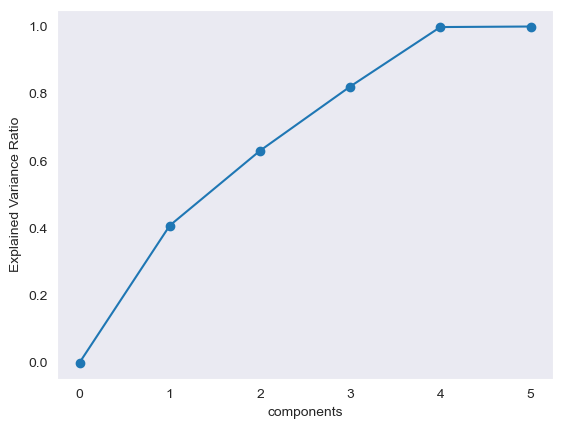

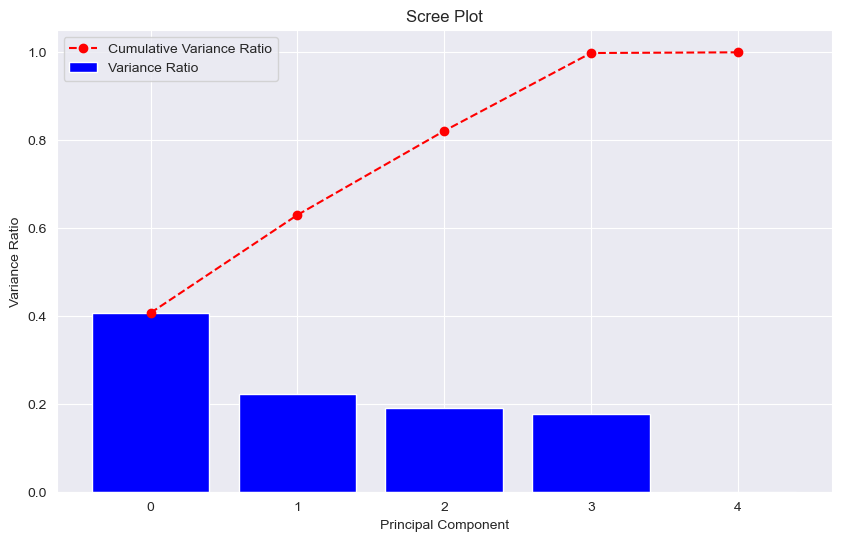

In [241]:
#plot the computed variance ratio per component
import matplotlib.pyplot as plt

plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


#analyze the graph
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
             label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()


scree_plot(pca)

In [242]:
#using the survey data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df2.head()

,Respondent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8a,Q8b,...,Q20,Q21,Q22,Q23,Q24,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1,Increasing pay,Full Time,3.0,Additional funding for Counselling,No,1,No,1,3,...,4,More women in leadership positions,Yes,East,15.0,NaN,NaN,NaN,NaN,NaN
1,2,Improve benefits,Full Time,1.0,Drug coverage,Yes,3,Yes,3,4,...,4,NaN,No,North,2.0,NaN,NaN,NaN,NaN,NaN
2,3,Job security,Part Time,NaN,NaN,No,1,No,3,1,...,5,NaN,No,North,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Job security,Part Time,NaN,NaN,I don't know,4,No,3,2,...,4,NaN,Yes,East,1.0,NaN,NaN,NaN,NaN,NaN
4,5,Improve working conditions,Full Time,3.0,Wellness account,Yes,3,No,2,3,...,2,Visible minorities are not given same project ...,Prefer not to answer,South,6.0,NaN,NaN,NaN,NaN,NaN


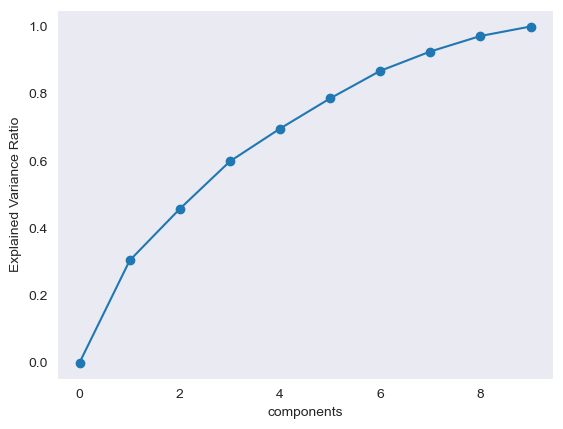

In [243]:
#for sample purposes - choose any column
df_likert = df2[["Q6", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q18", "Q20"]].copy()
#remove missing values
df_likert = df_likert.dropna()
#standardize data
scaler = StandardScaler()
scale_data = scaler.fit_transform(df_likert)
#range is 0 to 5 not including 6 - exclusive
nums = range(0, 9 + 1)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
#plot the computed variance ratio per component
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

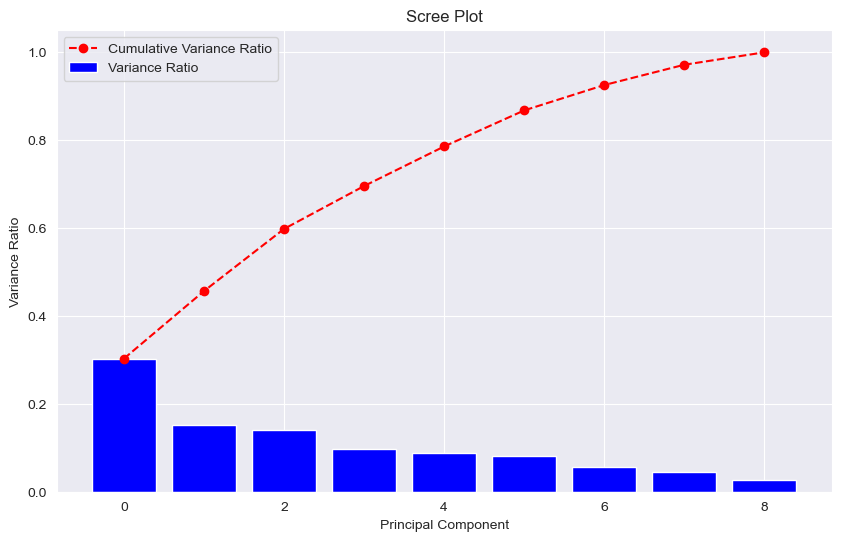

In [244]:
#analyze result
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
             label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()


scree_plot(pca)

In [245]:
#picdataset
#to show the use of PCA using a large dataset
x = fash.iloc[:, :784]

y = fash.iloc[:, -1]
#dataset representing an image where each pixel represent the matrix (10000rowsx785 columns)
#numbers 1 to 254 representing how dark is the color of the pixel
x = x[:10000]
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


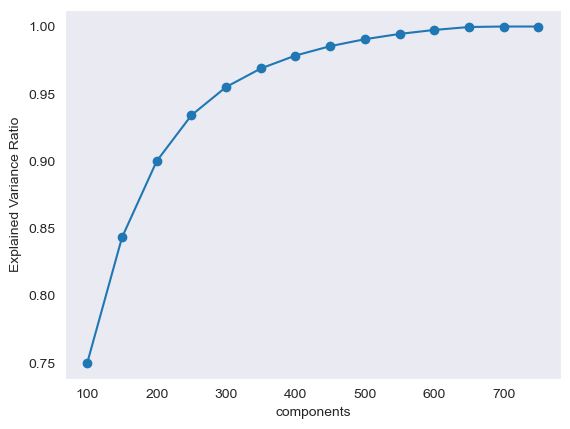

In [246]:
#large dataset using incremental PCA
#or regular PCA - for discussion purposes
#add data in batches to manage efficiently
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
scale_data = scaler.fit_transform(x)
#range of numbers starting from 100, ending at 784 (inclusive), with a step size of 50.
#sequence will start at 100, increment by 50 for each subsequent number, and stop before or at 785.
batch_size = None
nums = range(100, 784 + 1, 50)
var_ratio = []
for num in nums:
    ipca = IncrementalPCA(n_components=num, batch_size=batch_size)
    ipca.fit(scale_data)
    var_ratio.append(np.sum(ipca.explained_variance_ratio_))
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()
ipca = IncrementalPCA(n_components=200)
x_new = ipca.fit_transform(scale_data)

## Classification Model Development

### Data Exploration

In [247]:
glass = pd.read_csv('data/glass.csv')

# Load dataset
glass = pd.read_csv('data/glass.csv')
# Initial inspection
print("Data shape:", glass.shape)
glass.describe()

Data shape: (214, 11)


,idno,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Data Preprocessing

In [248]:
from sklearn.model_selection import train_test_split

# Use Scree to identify number of principal components
# Remove idno and separate type column
glass_features = glass.drop(columns=['idno', 'type'])
target = glass['type']

# Use 90% of Dataset as Training Data and 10% for validation
features_train, features_test, target_train, target_test = train_test_split(glass_features, target, test_size=0.1)
print(target_train)

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_train)

pca = PCA(n_components=6)
pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

print("6 components: ", sum(explained_variance))

14     1
132    2
91     2
75     2
145    2
      ..
190    7
104    2
100    2
93     2
77     2
Name: type, Length: 192, dtype: int64
6 components:  0.949677440012944


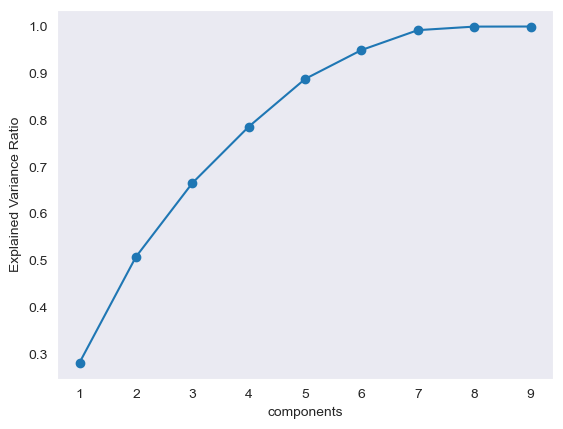

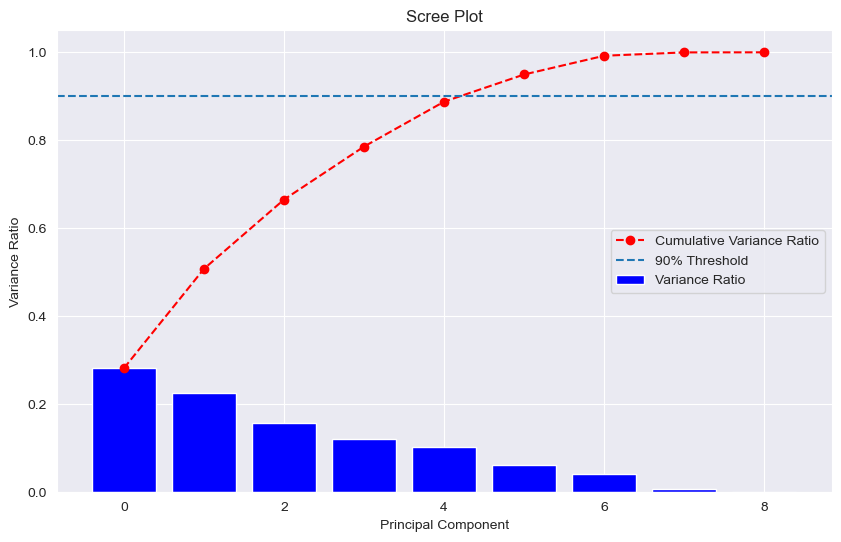

In [249]:
nums = range(1, scaled_data.shape[1] + 1)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scaled_data)
    var_ratio.append(sum(pca.explained_variance_ratio_))

# Plot the computed variance ratio per component
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Extract the principal components from the graph (6)
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
             label='Cumulative Variance Ratio')
    plt.axhline(y=0.9, linestyle='--', label='90% Threshold')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()


scree_plot(pca)

### Model Training

In [250]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

pca = PCA(n_components=6)
x_pca = pca.fit_transform(features_train)

n_splits = 8
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=10)

# RandomForestClassifier has better performance than Gaussian Naive Bayes
scores_pca = cross_validate(RandomForestClassifier(), x_pca, target_train, cv=cv, n_jobs=-1,
                            scoring=('accuracy', 'recall_macro', 'f1_macro'))

scores = cross_validate(RandomForestClassifier(), features_train, target_train, cv=cv, n_jobs=-1,
                        scoring=('accuracy', 'recall_macro', 'f1_macro'))

results = pd.DataFrame({
    'Features': ['All Features', 'PCA Features'],
    'Accuracy': [np.mean(scores['test_accuracy']), np.mean(scores_pca['test_accuracy'])],
    'Recall': [np.mean(scores['test_recall_macro']), np.mean(scores_pca['test_recall_macro'])],
    'F1-Score': [np.mean(scores['test_f1_macro']), np.mean(scores_pca['test_f1_macro'])]
})
results

,Features,Accuracy,Recall,F1-Score
0,All Features,0.770833,0.732350,0.699265
1,PCA Features,0.682292,0.623553,0.597598


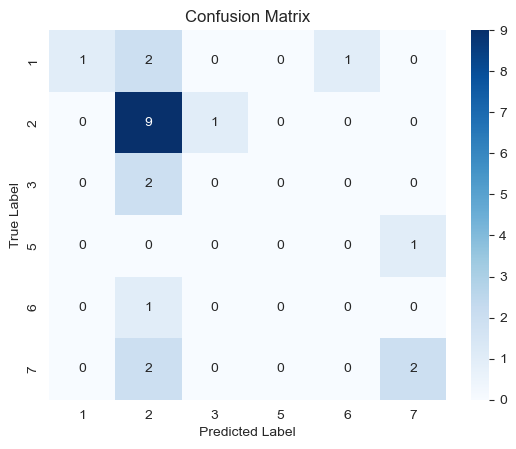

In [251]:
import seaborn as sns

# Confusion Matrix / Heatmap
pca = PCA(n_components=6)
x_pca_test = pca.fit_transform(features_test)
model = GaussianNB()
model.fit(x_pca, target_train)

y_pred = model.predict(x_pca_test)
conf_mat = confusion_matrix(target_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '5', '6', '7'],
            yticklabels=['1', '2', '3', '5', '6', '7'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()